# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [8]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [9]:
df = df_test.append(df_train).reset_index(drop=True)

In [10]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [12]:
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


In [13]:
df_train['GEN_INDUSTRY']

0                                         Торговля
1                                         Торговля
2                        Информационные технологии
3                                      Образование
4                           Государственная служба
5                                         Торговля
6                                     Другие сферы
7                               Сельское хозяйство
8                                  Здравоохранение
9                                      Образование
10                                     Образование
11                                    Другие сферы
12       Металлургия/Промышленность/Машиностроение
13                          Государственная служба
14                          Государственная служба
15                                        Торговля
16                                             NaN
17             Коммунальное хоз-во/Дорожные службы
18                                   Строительство
19       Металлургия/Промышленн

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{'Государственная служба', nan, 'Строительство', 'Недвижимость', 'Логистика', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Ресторанный бизнес/Общественное питание', 'Развлечения/Искусство', 'Маркетинг', 'Туризм', 'Торговля', 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Транспорт', 'Здравоохранение', 'Энергетика', 'Образование', 'Другие сферы', 'Наука', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Информационные услуги', 'Нефтегазовая промышленность', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть.
Вар. 1 - полностью удалить строки с отсутсвующими значениями, но это уменьшит размер обучающей выборки и скажется на качестве обучения.
Вар. 2 - заполнить пустые ячейки средним значением по столбцу, либо средним значение для определенного класса (пол, образование и т.п.).
Вар. 3 - если признак с отсутсвущими значениями не числовой и его невозможно интерпретировать с помощью чисел, то столбец полностью можно удалить.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки присутсвуют (например индивидуальный идентификатор, адреса, направление деятельности).
Числовые значения категориального признака мог


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    #Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'],axis=1)
    
    #Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].replace(',','.', regex=True).astype(float)
    df_output['CREDIT'] = df_output['CREDIT'].replace(',','.', regex=True).astype(float)
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].replace(',','.', regex=True).astype(float)
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].replace(',','.', regex=True).astype(float)
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].replace(',','.', regex=True).astype(float)
    
    #Что-то делала с пропусками
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('other')
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('other')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna('other')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna('other')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna('other')
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna('other')
    df_output['WORK_TIME']=df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].mean())
    df_output['PREVIOUS_CARD_NUM_UTILIZED']=df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    #Кодировала категориальные признаки
    #OneHotEncoding сделал для всех категориальных не чиловых признаков
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE',
                                                   'ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME',
                                                   'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE',
                                                   'POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

In [18]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 450 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(411)
memory usage: 20.8+ MB


In [19]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [20]:
df_train_preproc

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
14910,0,49,1,0,1,2,1,5000.0,1,1,...,0,0,1,0,0,0,0,0,0,0
14911,0,32,1,0,1,3,3,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
14912,0,52,1,0,1,4,0,9000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
14913,0,39,1,0,1,1,1,25000.0,0,1,...,0,0,0,0,0,0,0,0,0,1
14914,0,30,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
14915,0,29,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
14916,0,35,1,0,0,1,1,15000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
14917,0,41,1,0,1,0,0,6000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
14918,0,53,1,0,0,2,0,100000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
14919,0,43,1,0,1,0,0,7000.0,1,1,...,0,0,0,0,0,0,0,0,0,1


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
X = df_train_preproc.drop(['TARGET'],axis=1)
X_test = df_test_preproc.drop(['TARGET'],axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [22]:
print(len(X))
print(len(X_test))
print(len(y))
print(len(y_test))

15223
14910
15223
14910


#### Задание 5. Обучение и оценка качества разных моделей

In [25]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Your Code Here


In [27]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(data_train,target_train)
predict_DTC = model_DTC.predict(data_test)
predict_proba_DTC = model_DTC.predict_proba(data_test)

#RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(data_train,target_train)
predict_RFC = model_RFC.predict(data_test)
predict_proba_RFC = model_RFC.predict_proba(data_test)

#LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(data_train,target_train)
predict_LR = model_LR.predict(data_test)
predict_proba_LR = model_LR.predict_proba(data_test)
## Your Code Here

In [28]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_DTC = accuracy_score(target_test, predict_DTC)
precision_DTC = precision_score(target_test, predict_DTC)
recall_DTC = recall_score(target_test, predict_DTC)
print('accuracy_DTC', accuracy_DTC)
print('precision_DTC', precision_DTC)
print('recall_DTC', recall_DTC)
print('===============================')

accuracy_RFC = accuracy_score(target_test, predict_RFC)
precision_RFC = precision_score(target_test, predict_RFC)
recall_RFC = recall_score(target_test, predict_RFC)
print('accuracy_RFC', accuracy_RFC)
print('precision_RFC', precision_RFC)
print('recall_RFC', recall_RFC)
print('===============================')

accuracy_LR = accuracy_score(target_test, predict_LR)
precision_LR = precision_score(target_test, predict_LR)
recall_LR = recall_score(target_test, predict_LR)
print('accuracy_LR', accuracy_LR)
print('precision_LR', precision_LR)
print('recall_LR', recall_LR)
print('===============================')

## Your Code Here

accuracy_DTC 0.7937898089171974
precision_DTC 0.16822429906542055
recall_DTC 0.17704918032786884
accuracy_RFC 0.8763933121019108
precision_RFC 0.28
recall_RFC 0.011475409836065573
accuracy_LR 0.8783837579617835
precision_LR 0.4
recall_LR 0.003278688524590164


In [29]:
import pandas as pd
plot_info = pd.DataFrame({'accurency':[accuracy_DTC,accuracy_RFC,accuracy_LR],
                          'precision':[precision_DTC,precision_RFC,precision_LR],
                          'recall':[recall_DTC,recall_RFC,recall_LR]},
                        index=['DTC','RFC','LR'])
plot_info

,accurency,precision,recall
DTC,0.793790,0.168224,0.177049
RFC,0.876393,0.280000,0.011475
LR,0.878384,0.400000,0.003279


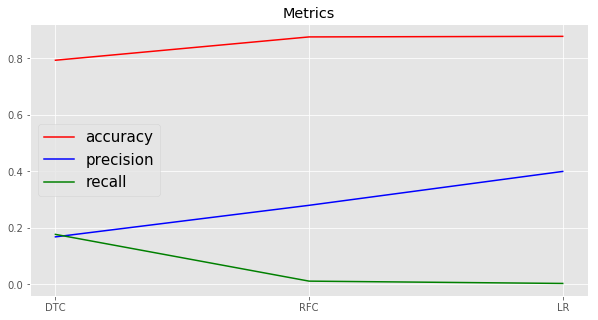

In [77]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.title('Metrics')
plt.plot(plot_info['accurency'],'r',label='accuracy')
plt.plot(plot_info['precision'],'b',label='precision')
plt.plot(plot_info['recall'],'g',label='recall')
plt.legend(loc='center left',fontsize=15)
## Your Code Here

(-0.01, 1.01)

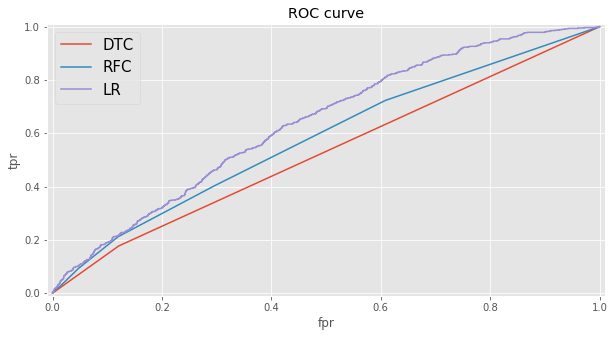

In [78]:
# Построить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(target_test, predict_proba_DTC[:,1])
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(target_test, predict_proba_RFC[:,1])
fpr_LR, tpr_LR, thresholds_LR = roc_curve(target_test, predict_proba_LR[:,1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_DTC, tpr_DTC,label='DTC')
plt.plot(fpr_RFC, tpr_RFC,label='RFC')
plt.plot(fpr_LR, tpr_LR,label='LR')
plt.legend(fontsize=15)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## Your Code Here

In [79]:
print('roc_auc:')
print('DTC',roc_auc_score(target_test, predict_proba_DTC[:,1]))
print('RFC',roc_auc_score(target_test, predict_proba_RFC[:,1]))
print('LR',roc_auc_score(target_test, predict_proba_LR[:,1]))

roc_auc:
DTC 0.5280352381023123
RFC 0.580681809740988
LR 0.6386694348087678


In [80]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc_a = cross_val_score(dtc,X,y,scoring='roc_auc',cv=10)
rfc_a = cross_val_score(rfc,X,y,scoring='roc_auc',cv=10)
lr_a = cross_val_score(lr,X,y,scoring='roc_auc',cv=10)
print('DTC:', dtc_a, 'mean:',dtc_a.mean())
print('RFC:', rfc_a, 'mean:',rfc_a.mean())
print('LR:', lr_a, 'mean:',lr_a.mean())


DTC: [0.51717135 0.51163434 0.54733212 0.52038555 0.54562028 0.52404613
 0.53806222 0.51642009 0.52814754 0.54367154] mean: 0.5292491158081372
RFC: [0.54161208 0.58485549 0.58875005 0.60087508 0.60347683 0.6120484
 0.57124229 0.58424075 0.6008998  0.57515007] mean: 0.5863150834080192
LR: [0.65696189 0.66104924 0.63716366 0.64167913 0.65172358 0.6787299
 0.6314946  0.68939647 0.66630823 0.64354135] mean: 0.6558048046966258


In [81]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
predict = model_LR.predict(X_test)
predict_proba = model_LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])

## Your Code Here

roc_auc: 0.6212415544941381


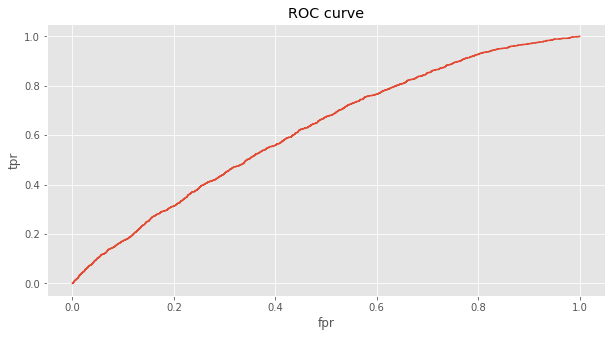

In [87]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
roc_auc = roc_auc_score(y_test, predict_proba[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')

print('roc_auc:',roc_auc)
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)